In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import xarray as xr

from FSSLibrary import FFTBasic as fft
import skyboxdatapy as skb

## Load the case

In [2]:
data_folder = "/home/shagun/Acads/SkyBox/ExpData/data_nosync"
testName = "Test300"

file = skb.io.find_unique_file(data_folder, testName, ext="mat")
print(f"Processing file: {file}")

# loaded_mat = skb.io.load_hdf5_mat(file)
loaded_mat = skb.io.load_case(file)

Processing file: /home/shagun/Acads/SkyBox/ExpData/data_nosync/d1007/Measure_MAT/Test300_M_d60_R_H100_T140_R01.mat

=== Reading MAT ===
Top-level keys: ['ConversionFactor', 'DefaultData', 'MP3Filtered', 'TestProperties']
=== Successfully loaded using hdf5storage ===



## Test Properties

In [3]:
skb.utils.print_test_properties(loaded_mat)


=== Test Properties ===
   - testName: Test300
   - testType: MPL
   - repeatType: R1
   - useTest: nan
   - fSampling: 2048.0
   - calibrationFile: Test_d1024_Calib
   - depthAtWM: 0.606
   - depthAtMPL: 0.573
   - waveType: Regular
   - waveAmplitude: 0.1
   - wavePeriod: 1.4
   - focusingLocation: nan
   - remarks: Empty = Test151, GP1, GP2, GP3
=== End of Test Properties ===



## List all headers in the dict

In [4]:
skb.utils.print_all_headers(loaded_mat)            


=== Listing headers ===
Top-level keys: ['ConversionFactor', 'DefaultData', 'MP3Filtered', 'TestProperties']

Top-level: ConversionFactor -> type: <class 'dict'>
   - WG01
   - WG02
   - WG03
   - WG04
   - WG05
   - WG06
   - WG07
   - WG08
   - WG09
   - WM
   - Mo01
   - Mo02
   - Mo03
   - Mo04
   - Mo05
   - Mo06
   - Mo07
   - Mo08
   - L1
   - L2
   - L3
-----

Top-level: DefaultData -> type: <class 'xarray.core.dataset.Dataset'>
KeysView(<xarray.Dataset> Size: 39MB
Dimensions:      (Time: 257059)
Coordinates:
  * Time         (Time) float64 2MB 0.0 0.0004883 0.0009766 ... 125.5 125.5
Data variables: (12/18)
    WG01         (Time) float64 2MB 5.618 5.618 5.618 ... -28.26 -28.27 -28.28
    WG02         (Time) float64 2MB 7.651 7.653 7.654 ... -30.37 -30.39 -30.4
    WG03         (Time) float64 2MB 6.084 6.085 6.087 ... -5.292 -5.359 -5.426
    WG04         (Time) float64 2MB -272.6 -272.6 -272.6 ... -272.6 -272.6
    WG05         (Time) float64 2MB -272.4 -272.4 -272.4 ... -272

## Extract Default Dataset

In [5]:
ds = loaded_mat["DefaultData"]

skb.utils.print_top_headers(ds)


=== Listing headers ===
Object type: <class 'xarray.core.dataset.Dataset'>
KeysView(<xarray.Dataset> Size: 39MB
Dimensions:      (Time: 257059)
Coordinates:
  * Time         (Time) float64 2MB 0.0 0.0004883 0.0009766 ... 125.5 125.5
Data variables: (12/18)
    WG01         (Time) float64 2MB 5.618 5.618 5.618 ... -28.26 -28.27 -28.28
    WG02         (Time) float64 2MB 7.651 7.653 7.654 ... -30.37 -30.39 -30.4
    WG03         (Time) float64 2MB 6.084 6.085 6.087 ... -5.292 -5.359 -5.426
    WG04         (Time) float64 2MB -272.6 -272.6 -272.6 ... -272.6 -272.6
    WG05         (Time) float64 2MB -272.4 -272.4 -272.4 ... -272.4 -272.4
    WG06         (Time) float64 2MB -269.9 -269.9 -269.9 ... -269.9 -269.9
    ...           ...
    Mo04         (Time) float64 2MB -63.82 -63.82 -63.82 ... -64.36 -64.36
    Mo05         (Time) float64 2MB -33.96 -33.96 -33.96 ... -30.75 -30.75
    Mo06         (Time) float64 2MB -31.41 -31.41 -31.41 ... -27.81 -27.81
    Mo07         (Time) float64 2M

## Plot signals

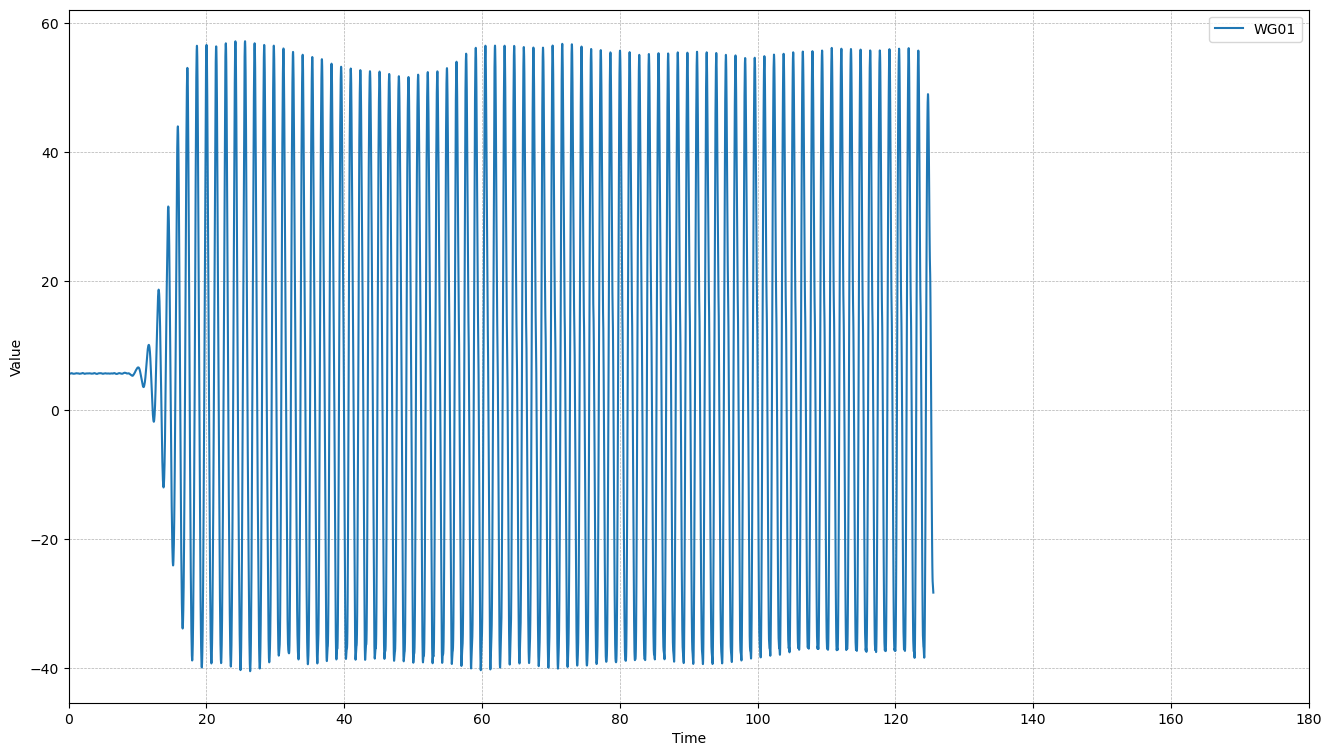

In [6]:
xmin = 0
xmax = 180


# Plot
plt.figure(figsize=(16,9))
plt.plot(ds['Time'], ds['WG01'], linestyle='-', label="WG01")
plt.xlabel("Time")
plt.ylabel("Value")
# plt.yticks(range(0,150,2))
plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()